<a href="https://colab.research.google.com/github/SIVANESAN2061/digit_audio_reg/blob/main/exp_4_(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import librosa
from librosa import display
import os
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report
from tqdm import tqdm
import os
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

<ipython-input-19-e2d91ad21a0c>:13: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(y=audio, sr=sr, x_axis='time', ax=axs[i])


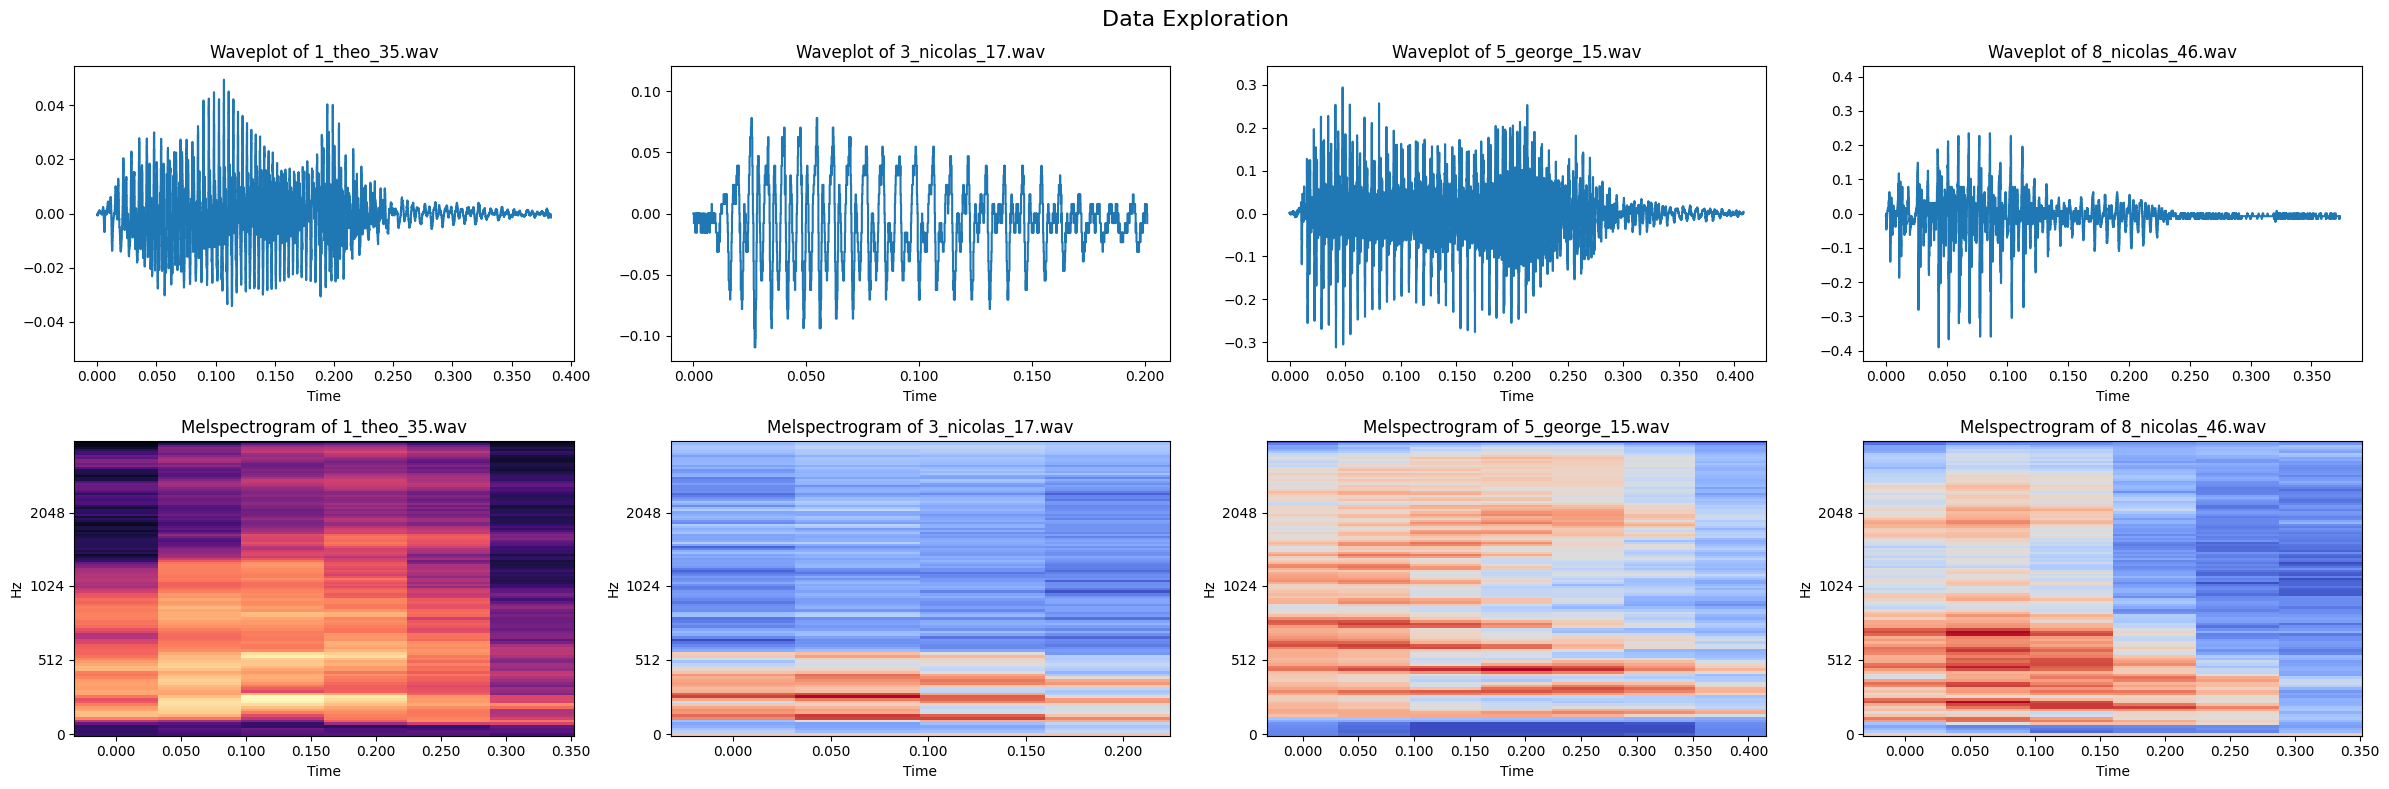

In [ ]:
visualize_digits = [1, 3, 5, 8]

description = pd.read_csv('/content/drive/MyDrive/PROJECT/rec/train.csv')
fig, axs = plt.subplots(nrows=2, ncols=(len(visualize_digits)))
axs = axs.flatten()
fig.suptitle('Data Exploration', fontsize=16)
fig.set_size_inches(24, 8)
for i, digit in enumerate(visualize_digits):
    # Select random file for selected digit
    rand_file = np.random.choice(description[description['label'] == digit]['file_name'])
    # Load audio and plot waveform and melspectrogram
    audio, sr = librosa.load(os.path.join('/content/drive/MyDrive/PROJECT/rec/recordings', rand_file), sr=None)
    librosa.display.waveshow(y=audio, sr=sr, x_axis='time', ax=axs[i])
    axs[i].set(title=f'Waveplot of {rand_file}')
    mels_db = librosa.power_to_db(S=librosa.feature.melspectrogram(y=audio, sr=sr), ref=1.0)
    librosa.display.specshow(data=mels_db, sr=sr, x_axis='time', y_axis='mel', ax=axs[i+len(visualize_digits)])
    axs[i+len(visualize_digits)].set(title=f'Melspectrogram of {rand_file}')
plt.tight_layout()
plt.show()

In [ ]:
feature_list = []
label_list = []

print('Preparing feature dataset and labels.')
for file in tqdm(os.listdir('/content/drive/MyDrive/PROJECT/rec/recordings')):
    if not file.endswith('.wav'):
        continue

    audio_path = os.path.join('/content/drive/MyDrive/PROJECT/rec/recordings', file)
    audio, sr = librosa.load(path=audio_path, sr=None)
    audio = librosa.effects.time_stretch(y=audio, rate=len(audio)/sr)

    mels = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=2048, hop_length=512)
    mels_db = librosa.power_to_db(S=mels, ref=1.0)
    feature_list.append(mels_db.reshape((128, 16, 1)))
    label_list.append(file[0])

features = np.array(feature_list)
labels = np.array(label_list)

Preparing feature dataset and labels.


100%|██████████| 3020/3020 [01:14<00:00, 40.52it/s]


EPOCH: 1/10 - Test Accuracy: 96.58%
EPOCH: 2/10 - Test Accuracy: 96.58%
EPOCH: 3/10 - Test Accuracy: 96.58%
EPOCH: 4/10 - Test Accuracy: 96.58%
EPOCH: 5/10 - Test Accuracy: 96.58%
EPOCH: 6/10 - Test Accuracy: 96.58%
EPOCH: 7/10 - Test Accuracy: 96.58%
EPOCH: 8/10 - Test Accuracy: 96.58%
EPOCH: 9/10 - Test Accuracy: 96.58%
EPOCH: 10/10 - Test Accuracy: 96.58%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        85
           1       0.99      0.94      0.96        94
           2       0.94      1.00      0.97        90
           3       0.92      0.96      0.94        93
           4       1.00      1.00      1.00        89
           5       0.99      0.98      0.98        89
           6       0.96      0.93      0.95        84
           7       1.00      0.92      0.96       100
           8       0.98      0.97      0.97        95
           9       0.90      0.99      0.94        87

    accuracy        

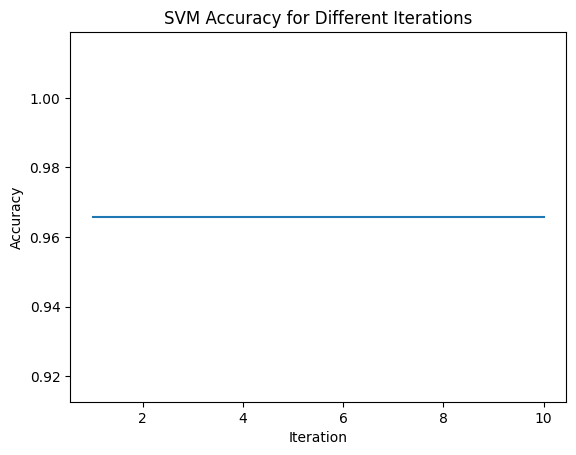

In [ ]:
TEST_SIZE = 0.3
BATCH_SIZE = 64
EPOCHS = 10
# Flatten the spectrogram data
X_flat = features.reshape(features.shape[0], -1)
# Split dataset to train and test data
X_train, X_test, y_train, y_test = train_test_split(X_flat, labels, test_size=TEST_SIZE, random_state=42)
# Initialize SVM
svm_model = SVC()
# Initialize a list to store accuracies at each iteration
epoch_accuracies = []

for epoch in range(EPOCHS):
    # Train the model
    svm_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = svm_model.predict(X_test)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Store the accuracy for this iteration
    epoch_accuracies.append(accuracy)

    print(f'EPOCH: {epoch + 1}/{EPOCHS} - Test Accuracy: {accuracy:.2%}')

# Print classification report
y_pred = svm_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print support vector count and shape
print("\nSupport Vectors:")
print(f"Number of support vectors: {svm_model.n_support_}")
print(f"Indices of support vectors: {svm_model.support_}")

# Plot the training history
plt.plot(range(1, EPOCHS + 1), epoch_accuracies)
plt.title('SVM Accuracy for Different Iterations')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.show()

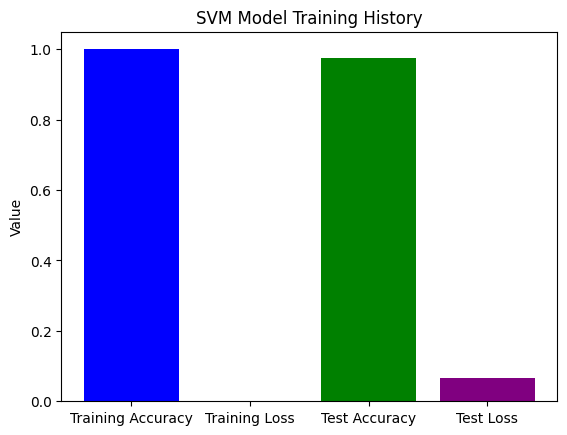

In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, hinge_loss
from sklearn.model_selection import train_test_split

# Assuming you have flattened features (X_flat) and labels (labels)
X_train, X_test, y_train, y_test = train_test_split(X_flat, labels, test_size=TEST_SIZE, random_state=42)

# Initialize and train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = svm_model.predict(X_train)

# Evaluate accuracy and hinge loss on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_loss = hinge_loss(y_train, svm_model.decision_function(X_train))

# Make predictions on the test set
y_test_pred = svm_model.predict(X_test)

# Evaluate accuracy and hinge loss on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_loss = hinge_loss(y_test, svm_model.decision_function(X_test))

# Bar graph
labels = ['Training Accuracy', 'Training Loss', 'Test Accuracy', 'Test Loss']
values = [train_accuracy, train_loss, test_accuracy, test_loss]

plt.bar(labels, values, color=['blue', 'red', 'green', 'purple'])
plt.title('SVM Model Training History')
plt.ylabel('Value')
plt.show()
